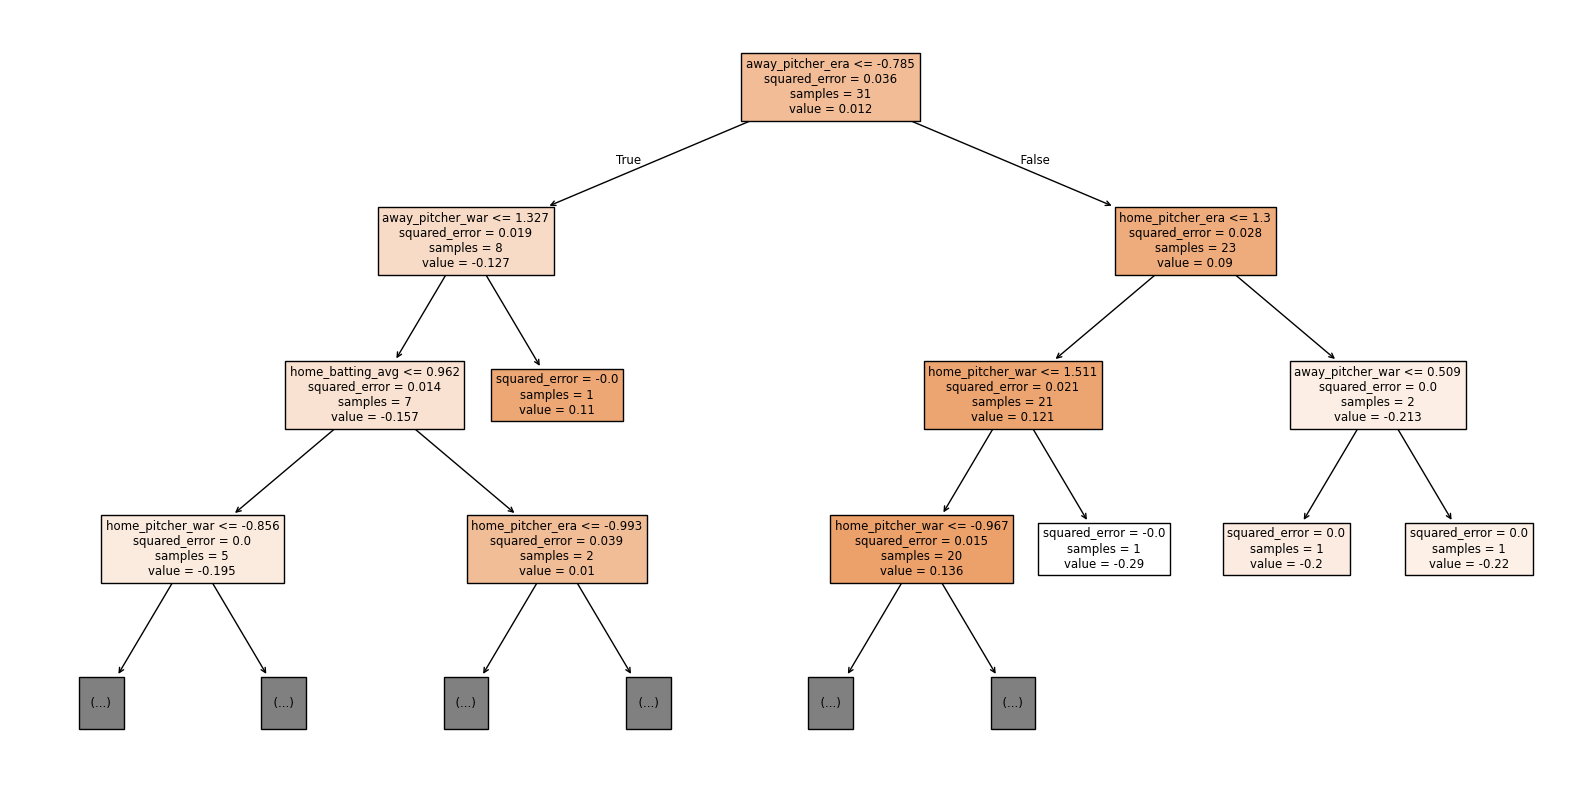

In [5]:
from sklearn.tree import plot_tree

# 단일 트리 추출 (랜덤 포레스트에서 첫 번째 트리만)
tree = model.named_steps['randomforestregressor'].estimators_[0]

# 트리 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, filled=True, max_depth=3)
plt.show()

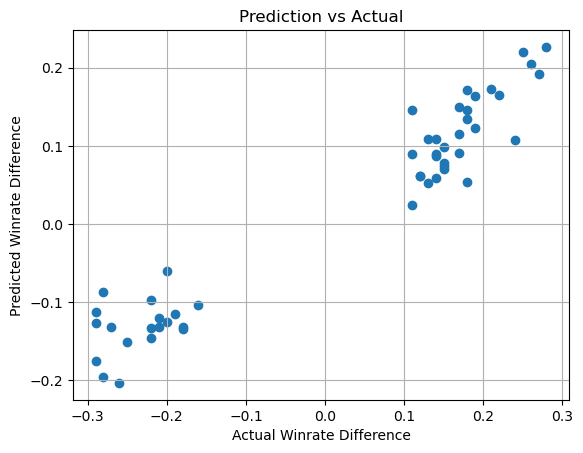

In [6]:
import matplotlib.pyplot as plt

predicted_train = model.predict(data[features])
plt.scatter(data['winrate_diff'], predicted_train)
plt.xlabel("Actual Winrate Difference")
plt.ylabel("Predicted Winrate Difference")
plt.title("Prediction vs Actual")
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21196\2951173911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="viridis")


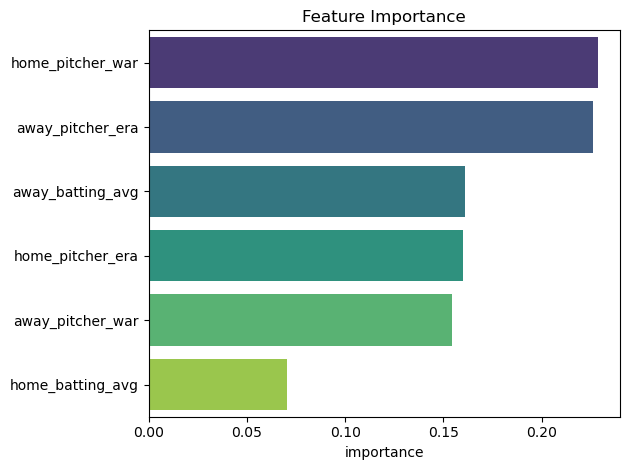

In [9]:
import seaborn as sns

importances = model.named_steps['randomforestregressor'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance_df)
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="viridis")
plt.ylabel("")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()



In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import os
import glob


# 1. 학습용 데이터
data = pd.DataFrame({
    'home_pitcher_era': [2.45, 3.12, 4.01, 3.95, 3.30, 2.85, 3.73, 2.67, 3.95, 4.10, 3.40, 3.58, 2.71, 3.85, 2.35, 4.45, 2.95, 3.11, 2.82, 3.48,3.22, 2.55, 3.97, 4.33, 3.27, 3.12, 2.74, 2.89, 3.64, 3.99, 3.55, 3.78, 2.55, 3.50, 2.66, 3.93, 3.88, 3.10, 2.81,3.45, 3.89, 2.77, 3.60, 4.10, 3.56, 2.84, 2.96, 3.25, 3.90, 3.25],
    'away_pitcher_era': [3.45, 4.11, 3.33, 2.85, 2.90, 2.75, 4.01, 3.55, 3.88, 3.80, 2.73, 4.10, 3.65, 2.55, 2.90, 3.75, 3.60, 4.33, 3.95, 4.01,3.78, 3.22, 3.91, 2.99, 4.35, 3.75, 3.40, 4.22, 3.20, 4.11, 3.55, 3.25, 4.05, 3.66, 4.44, 3.20, 3.92, 4.01, 3.80,4.25, 3.91, 2.97, 3.82, 3.55, 2.87, 3.61, 3.77, 3.50, 3.42, 3.50],
    'home_pitcher_war': [4.10, 3.22, 3.55, 4.23, 3.80, 3.75, 3.90, 3.50, 4.10, 4.00, 3.66, 3.33, 4.20, 3.72, 3.88, 3.90, 4.15, 3.77, 4.35, 4.22, 3.56, 3.91, 4.26, 3.75, 4.00, 3.78, 3.65, 3.22, 3.40, 4.11, 3.55, 4.08, 3.88, 4.15, 4.00, 3.95, 4.21, 3.17, 3.90,4.11, 3.93, 3.11, 4.22, 3.55, 3.82, 3.91, 4.15, 3.45, 3.91, 3.45],
    'away_pitcher_war': [3.66, 3.11, 2.99, 3.55, 3.80, 3.72, 3.62, 3.40, 3.88, 3.33, 4.12, 3.88, 3.75, 4.10, 3.66, 3.55, 2.78, 3.25, 3.09, 3.88, 3.33, 3.45, 3.66, 3.99, 3.55, 3.88, 3.22, 3.72, 3.45, 3.60, 4.11, 3.40, 3.50, 3.66, 3.35, 3.77, 4.22, 3.12, 3.99, 3.55, 3.88, 4.11, 3.72, 4.33, 4.08, 4.12, 3.40, 4.24, 3.40, 3.72],
    'home_batting_avg': [0.288, 0.265, 0.270, 0.285, 0.290, 0.273, 0.278, 0.270, 0.295, 0.280, 0.268, 0.273, 0.275, 0.286, 0.293, 0.290, 0.265, 0.267, 0.275, 0.272, 0.280, 0.278, 0.290, 0.285, 0.274, 0.276, 0.268, 0.270, 0.285, 0.284, 0.267, 0.278, 0.289, 0.275, 0.293, 0.283, 0.290, 0.292, 0.288, 0.276, 0.284, 0.275, 0.277, 0.290, 0.285, 0.274, 0.289, 0.278, 0.275, 0.289],
    'away_batting_avg': [0.273, 0.290, 0.265, 0.285, 0.278, 0.288, 0.274, 0.286, 0.264, 0.276, 0.290, 0.274, 0.280, 0.288, 0.270, 0.265, 0.274, 0.281, 0.268, 0.270, 0.278, 0.285, 0.265, 0.274, 0.289, 0.265, 0.270, 0.276, 0.278, 0.285, 0.283, 0.270, 0.280, 0.290, 0.278, 0.277, 0.273, 0.281, 0.280, 0.268, 0.283, 0.277, 0.287, 0.268, 0.275, 0.286, 0.265, 0.270, 0.278, 0.289],
    'winrate_diff': [0.12, -0.25, 0.18, -0.22, 0.15, 0.13, 0.18, -0.28, 0.22, -0.2, 0.11, 0.14, 0.18, -0.21, -0.27, 0.15, 0.17, 0.12, -0.29, 0.25, 0.15, -0.22, 0.28, -0.18, 0.21, 0.19, -0.26, 0.17, -0.19, 0.27, -0.29, 0.14, 0.11, -0.28, 0.19, -0.16, 0.13, -0.21, 0.17, 0.11, -0.29, -0.18, 0.26, -0.22, 0.15, 0.14, 0.18, -0.20, 0.24, 0.14]
})

features = [
    'home_pitcher_era', 'away_pitcher_era',
    'home_pitcher_war', 'away_pitcher_war',
    'home_batting_avg', 'away_batting_avg'
]

# 2. 회귀 모델 학습 (스케일러 포함 파이프라인)
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(data[features], data['winrate_diff'])

# 3. 예측 함수 정의
def predict_winrate(input_df: pd.DataFrame):
    predicted_diff = model.predict(input_df[features])

    # 예측된 승률 차이로부터 홈/원정 승률 계산
    home_winrate = (predicted_diff + 1) / 2
    away_winrate = 1 - home_winrate

    result_df = input_df.copy()
    result_df['predicted_winrate_diff'] = predicted_diff
    result_df['home_winrate'] = home_winrate
    result_df['away_winrate'] = away_winrate

    return result_df[['predicted_winrate_diff', 'home_winrate', 'away_winrate']]


# 4. 새로운 경기 예측

csv_files = glob.glob(os.path.join('../../csv/', 'new_games*.csv'))
new_games = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Extract the first four columns from the original new_games DataFrame
metadata_columns = ['home_team', 'away_team', 'home_pitcher', 'away_pitcher']
metadata = new_games[metadata_columns] if all(col in new_games.columns for col in metadata_columns) else None

# 메타데이터 제거 후 nea_games DataFrame 생성
new_games = new_games.drop(columns=metadata_columns)

# 경기 예측측
predicted = predict_winrate(new_games)

predicted = pd.concat([metadata.reset_index(drop=True), predicted.reset_index(drop=True)], axis=1)
# predicted.to_csv('../csv/oddsofwinning_ml.csv', index=False, encoding='utf-8-sig')


print(predicted)


  home_team away_team home_pitcher away_pitcher  predicted_winrate_diff  \
0        KT       SSG          오원석          김광현                 -0.0266   
1        LG        NC          임찬규          신민혁                 -0.0425   
2        NC        LG          신민혁          임찬규                 -0.0726   
3        롯데        한화           반즈          와이스                 -0.0221   
4        삼성       KIA          최원태          김도현                 -0.0263   
5        키움        두산          하영민          최승용                 -0.0485   

   home_winrate  away_winrate  
0       0.48670       0.51330  
1       0.47875       0.52125  
2       0.46370       0.53630  
3       0.48895       0.51105  
4       0.48685       0.51315  
5       0.47575       0.52425  
